In [110]:
import cv2
import utils
import os
import matplotlib
import matplotlib.pyplot as plt
import albumentations as A
import numpy as np
from transformers import AutoImageProcessor

In [111]:
model_name = "openmmlab/upernet-convnext-small"
image_processor = AutoImageProcessor.from_pretrained(model_name)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5528543].


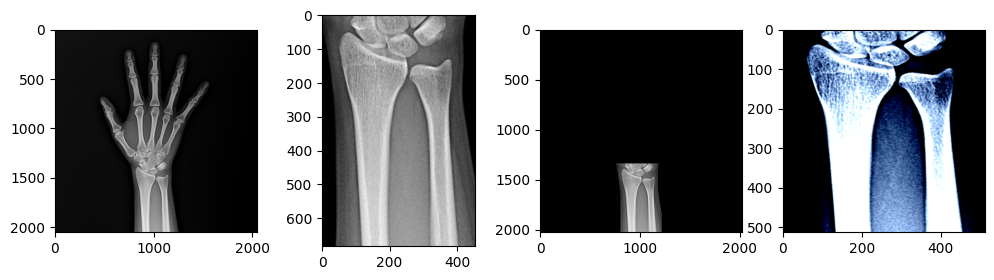

In [116]:
image_path = '/data/ephemeral/home/data/train/DCM/ID001/image1661130828152_R.png'
crop_info_path = '/data/ephemeral/home/Dongjin/level2-cv-semanticsegmentation-cv-02-lv3/Baseline/Dongjin/transformers_1122/notebook/crop/result/crop_info.json'
crop_type = 'crop_arm'

image_size = (2024, 2024)

crop_infos = utils.read_json(crop_info_path)

image = cv2.imread(image_path)
image_name = os.path.basename(image_path)
crop_info = crop_infos[image_name]
x1, x2, y1, y2 = crop_info[crop_type]


image_crop = A.crop(image, x_min=x1, y_min=y1, x_max=x2+1, y_max=y2+1)
image_crop_restore = np.zeros(image_size + (3,), dtype=np.uint8)
image_crop_restore[y1:y2+1, x1:x2+1, :] = image_crop
image_proc = image_processor(image_crop)


fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(image)
axes[1].imshow(image_crop)
axes[2].imshow(image_crop_restore)
axes[3].imshow(image_proc['pixel_values'][0].transpose(1, 2, 0))